## Lab | Random variable distributions

### 1. Import the necessary libraries.

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import datetime
import re
import math
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# To make run all you ask in one cell, not only the last required
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [19]:
import warnings
warnings.filterwarnings('ignore')

### 2. Load file

In [20]:
data = pd.read_csv('C:/Student/IRONHACK/Week4/D4_Random_Variable_Distributions/Labs/lab-random-variable-distributions/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.shape)
data.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 3. Get numerical variables

In [21]:
numerical = data.select_dtypes(np.number)
numerical.columns
numerical.head()

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


### 4. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

In [22]:
# for column in numerical:
#     sns.displot(numerical[column])   


Text(0.5, 0.98, 'Distribution of numerical variables')

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Density'>

<AxesSubplot:xlabel='Income', ylabel='Density'>

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Density'>

<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Density'>

<AxesSubplot:xlabel='Months Since Last Claim', ylabel='Density'>

<AxesSubplot:xlabel='Months Since Policy Inception', ylabel='Density'>

<AxesSubplot:xlabel='Number of Open Complaints', ylabel='Density'>

<AxesSubplot:xlabel='Number of Policies', ylabel='Density'>

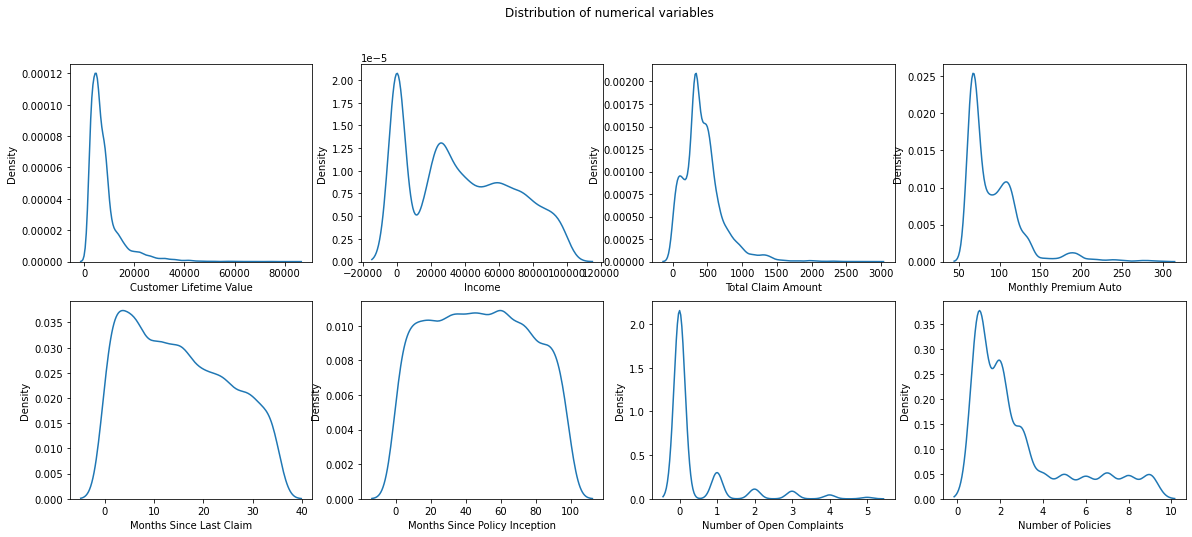

In [23]:
fig, axes = plt.subplots(2,4,  figsize=(20, 8))

fig.suptitle('Distribution of numerical variables')

sns.kdeplot(ax=axes[0,0],data= numerical, x='Customer Lifetime Value')
sns.kdeplot(ax=axes[0,1],data= numerical, x= 'Income')
sns.kdeplot(ax=axes[0,2],data= numerical, x= 'Total Claim Amount')
sns.kdeplot(ax=axes[0,3],data= numerical, x= 'Monthly Premium Auto')
sns.kdeplot(ax=axes[1,0],data= numerical, x= 'Months Since Last Claim')
sns.kdeplot(ax=axes[1,1],data= numerical, x= 'Months Since Policy Inception')
sns.kdeplot(ax=axes[1,2],data= numerical, x= 'Number of Open Complaints')
sns.kdeplot(ax=axes[1,3],data= numerical, x= 'Number of Policies')
     

In [24]:
# Discussion

### 5. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

Text(0.5, 0.98, 'Distribution of numerical variables after log10 transformation')

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Density'>

<AxesSubplot:xlabel='Income', ylabel='Density'>

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Density'>

<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Density'>

<AxesSubplot:xlabel='Months Since Last Claim', ylabel='Density'>

<AxesSubplot:xlabel='Months Since Policy Inception', ylabel='Density'>

<AxesSubplot:xlabel='Number of Open Complaints', ylabel='Density'>

<AxesSubplot:xlabel='Number of Policies', ylabel='Density'>

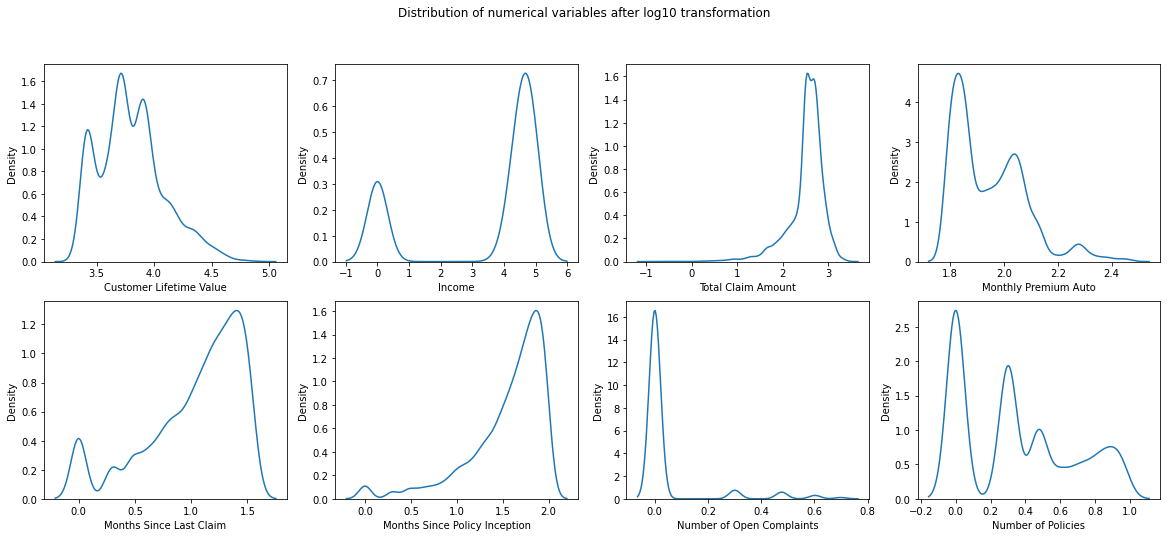

In [27]:
#Function to log transform all numerical variables

def log_transform(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0
numerical_log = numerical
for i in numerical_log.columns:
    numerical_log[i] = numerical_log[i].apply(log_transform)

# Plot them    
fig, axes = plt.subplots(2,4,  figsize=(20, 8))

fig.suptitle('Distribution of numerical variables after log10 transformation')

sns.kdeplot(ax=axes[0,0],data= numerical_log, x='Customer Lifetime Value')
sns.kdeplot(ax=axes[0,1],data= numerical_log, x= 'Income')
sns.kdeplot(ax=axes[0,2],data= numerical_log, x= 'Total Claim Amount')
sns.kdeplot(ax=axes[0,3],data= numerical_log, x= 'Monthly Premium Auto')
sns.kdeplot(ax=axes[1,0],data= numerical_log, x= 'Months Since Last Claim')
sns.kdeplot(ax=axes[1,1],data= numerical_log, x= 'Months Since Policy Inception')
sns.kdeplot(ax=axes[1,2],data= numerical_log, x= 'Number of Open Complaints')
sns.kdeplot(ax=axes[1,3],data= numerical_log, x= 'Number of Policies')    
           
# for i in numerical_log.columns:
#     sns.displot(data=numerical_log[i],bins=200)

Text(0.5, 0.98, 'Distribution of numerical variables after MinMax Scaler')

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Density'>

<AxesSubplot:xlabel='Income', ylabel='Density'>

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Density'>

<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Density'>

<AxesSubplot:xlabel='Months Since Last Claim', ylabel='Density'>

<AxesSubplot:xlabel='Months Since Policy Inception', ylabel='Density'>

<AxesSubplot:xlabel='Number of Open Complaints', ylabel='Density'>

<AxesSubplot:xlabel='Number of Policies', ylabel='Density'>

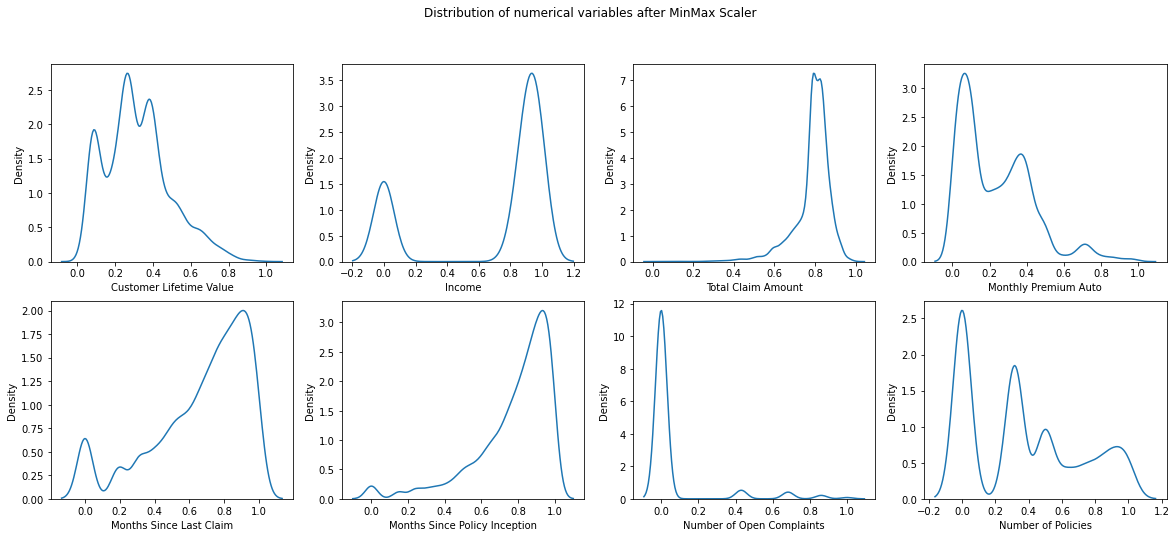

In [30]:
#Function to apply MinMax Scaler to all numerical variables

from sklearn.preprocessing import MinMaxScaler

numerical_minmax = numerical

transformer = MinMaxScaler().fit(numerical_minmax)
numerical_minmax = transformer.transform(numerical_minmax)
numerical_minmax = pd.DataFrame(numerical_minmax, columns=numerical.columns)

# Plot them    
fig, axes = plt.subplots(2,4,  figsize=(20, 8))

fig.suptitle('Distribution of numerical variables after MinMax Scaler')

sns.kdeplot(ax=axes[0,0],data= numerical_minmax, x='Customer Lifetime Value')
sns.kdeplot(ax=axes[0,1],data= numerical_minmax, x= 'Income')
sns.kdeplot(ax=axes[0,2],data= numerical_minmax, x= 'Total Claim Amount')
sns.kdeplot(ax=axes[0,3],data= numerical_minmax, x= 'Monthly Premium Auto')
sns.kdeplot(ax=axes[1,0],data= numerical_minmax, x= 'Months Since Last Claim')
sns.kdeplot(ax=axes[1,1],data= numerical_minmax, x= 'Months Since Policy Inception')
sns.kdeplot(ax=axes[1,2],data= numerical_minmax, x= 'Number of Open Complaints')
sns.kdeplot(ax=axes[1,3],data= numerical_minmax, x= 'Number of Policies')    
           
# for i in numerical_minmax.columns:
#     sns.displot(numerical_minmax[i],bins=200)

Text(0.5, 0.98, 'Distribution of numerical variables after Standard Scaler')

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Density'>

<AxesSubplot:xlabel='Income', ylabel='Density'>

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Density'>

<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Density'>

<AxesSubplot:xlabel='Months Since Last Claim', ylabel='Density'>

<AxesSubplot:xlabel='Months Since Policy Inception', ylabel='Density'>

<AxesSubplot:xlabel='Number of Open Complaints', ylabel='Density'>

<AxesSubplot:xlabel='Number of Policies', ylabel='Density'>

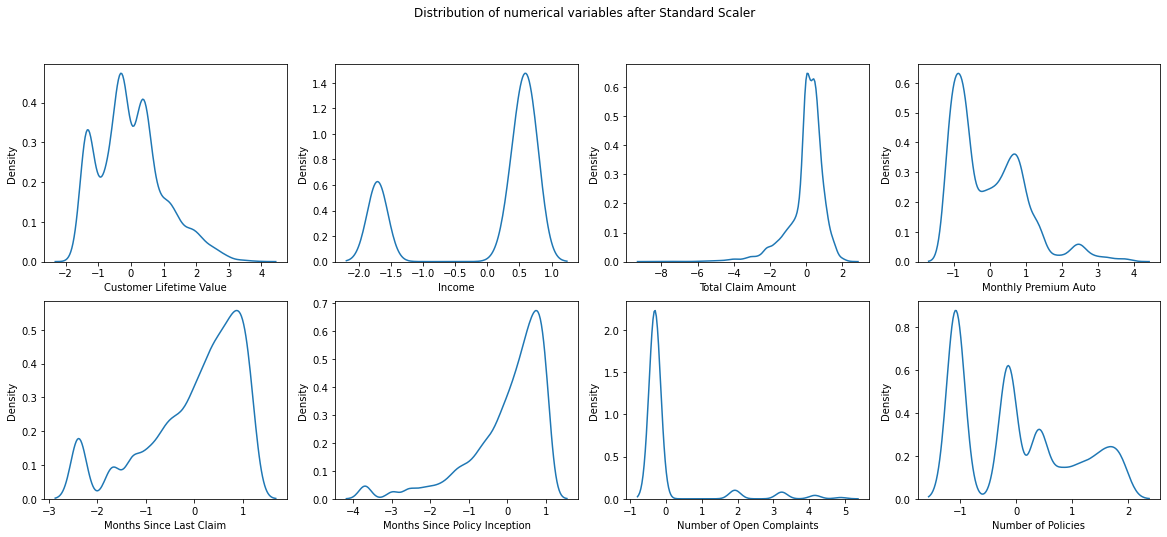

In [31]:
#Function to apply Standard Scaler to all numerical variables

from sklearn.preprocessing import StandardScaler

numerical_st = numerical
numerical_st = pd.DataFrame(StandardScaler().fit(numerical_st).transform(numerical_st), columns=numerical.columns)

# Plot them    
fig, axes = plt.subplots(2,4,  figsize=(20, 8))

fig.suptitle('Distribution of numerical variables after Standard Scaler')

sns.kdeplot(ax=axes[0,0],data= numerical_st, x='Customer Lifetime Value')
sns.kdeplot(ax=axes[0,1],data= numerical_st, x= 'Income')
sns.kdeplot(ax=axes[0,2],data= numerical_st, x= 'Total Claim Amount')
sns.kdeplot(ax=axes[0,3],data= numerical_st, x= 'Monthly Premium Auto')
sns.kdeplot(ax=axes[1,0],data= numerical_st, x= 'Months Since Last Claim')
sns.kdeplot(ax=axes[1,1],data= numerical_st, x= 'Months Since Policy Inception')
sns.kdeplot(ax=axes[1,2],data= numerical_st, x= 'Number of Open Complaints')
sns.kdeplot(ax=axes[1,3],data= numerical_st, x= 'Number of Policies')    

# for i in numerical_st.columns:
#     sns.displot(numerical_st[i],bins=200)